# Exploratory Data Analysis — Vehicle Fuel Efficiency

This notebook performs EDA on the Auto MPG dataset, including:
- Data overview & statistics
- Missing value analysis
- Correlation analysis
- Distribution & outlier detection
- Feature engineering insights

In [4]:
import sys, os
sys.path.insert(0, os.path.abspath('..'))

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm, skew

import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')
%matplotlib inline

## 1. Load Data

In [5]:
from src.data_preprocessing import load_data

data = load_data(os.path.join('..', 'data', 'raw', 'auto-mpg.data'))
print(f'Shape: {data.shape}')
data.head()

Shape: (398, 8)


,target,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   target        398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [7]:
data.describe()

,target,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


## 2. Missing Values

In [8]:
print('Missing values per column:')
print(data.isnull().sum())
print(f'\nTotal missing: {data.isnull().sum().sum()}')

Missing values per column:
target          0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

Total missing: 6


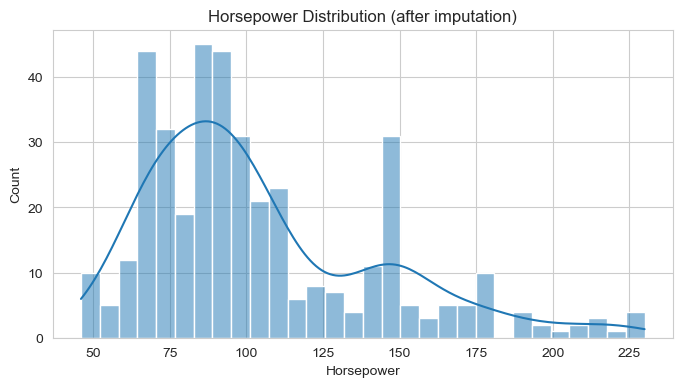

In [9]:
from src.data_preprocessing import handle_missing_values

data = handle_missing_values(data)

plt.figure(figsize=(8, 4))
sns.histplot(data['Horsepower'], kde=True, bins=30)
plt.title('Horsepower Distribution (after imputation)')
plt.show()

## 3. Correlation Analysis

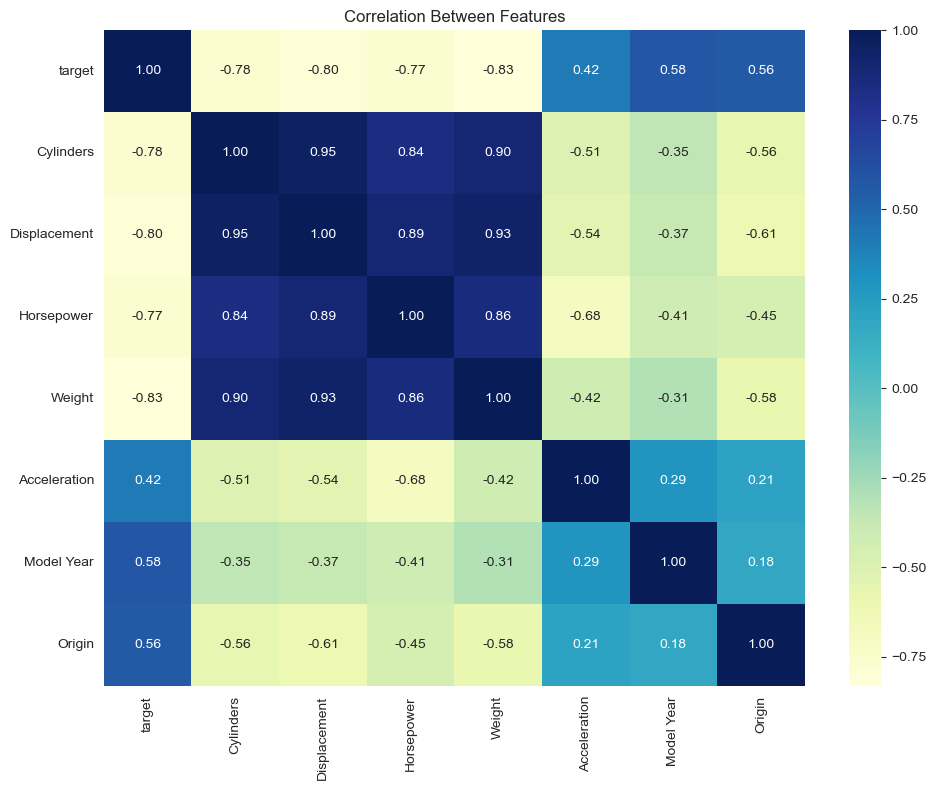

In [10]:
plt.figure(figsize=(10, 8))
corr_matrix = data.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Correlation Between Features')
plt.tight_layout()
plt.show()

Highly correlated features: ['target', 'Cylinders', 'Displacement', 'Horsepower', 'Weight']


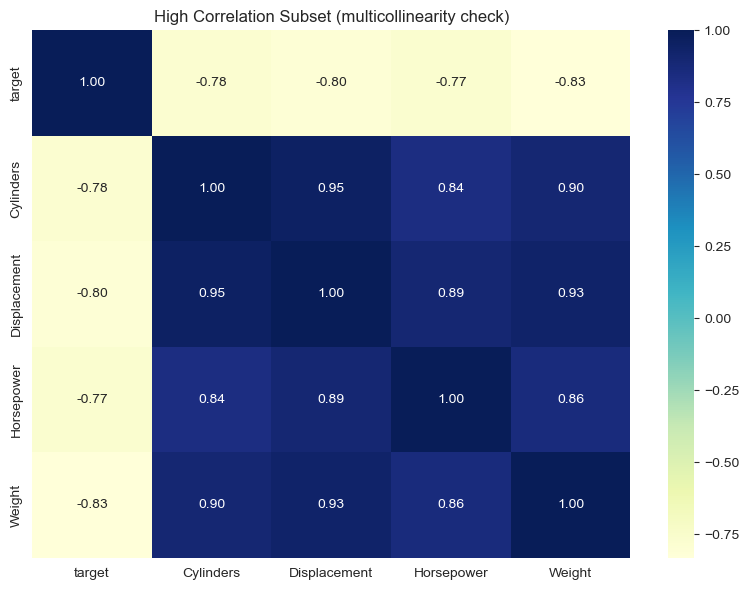

In [11]:
# Features highly correlated with target (|r| > 0.75)
threshold = 0.75
high_corr = corr_matrix.columns[np.abs(corr_matrix['target']) > threshold].tolist()
print(f'Highly correlated features: {high_corr}')

plt.figure(figsize=(8, 6))
sns.heatmap(data[high_corr].corr(), annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('High Correlation Subset (multicollinearity check)')
plt.tight_layout()
plt.show()

## 4. Pairplot

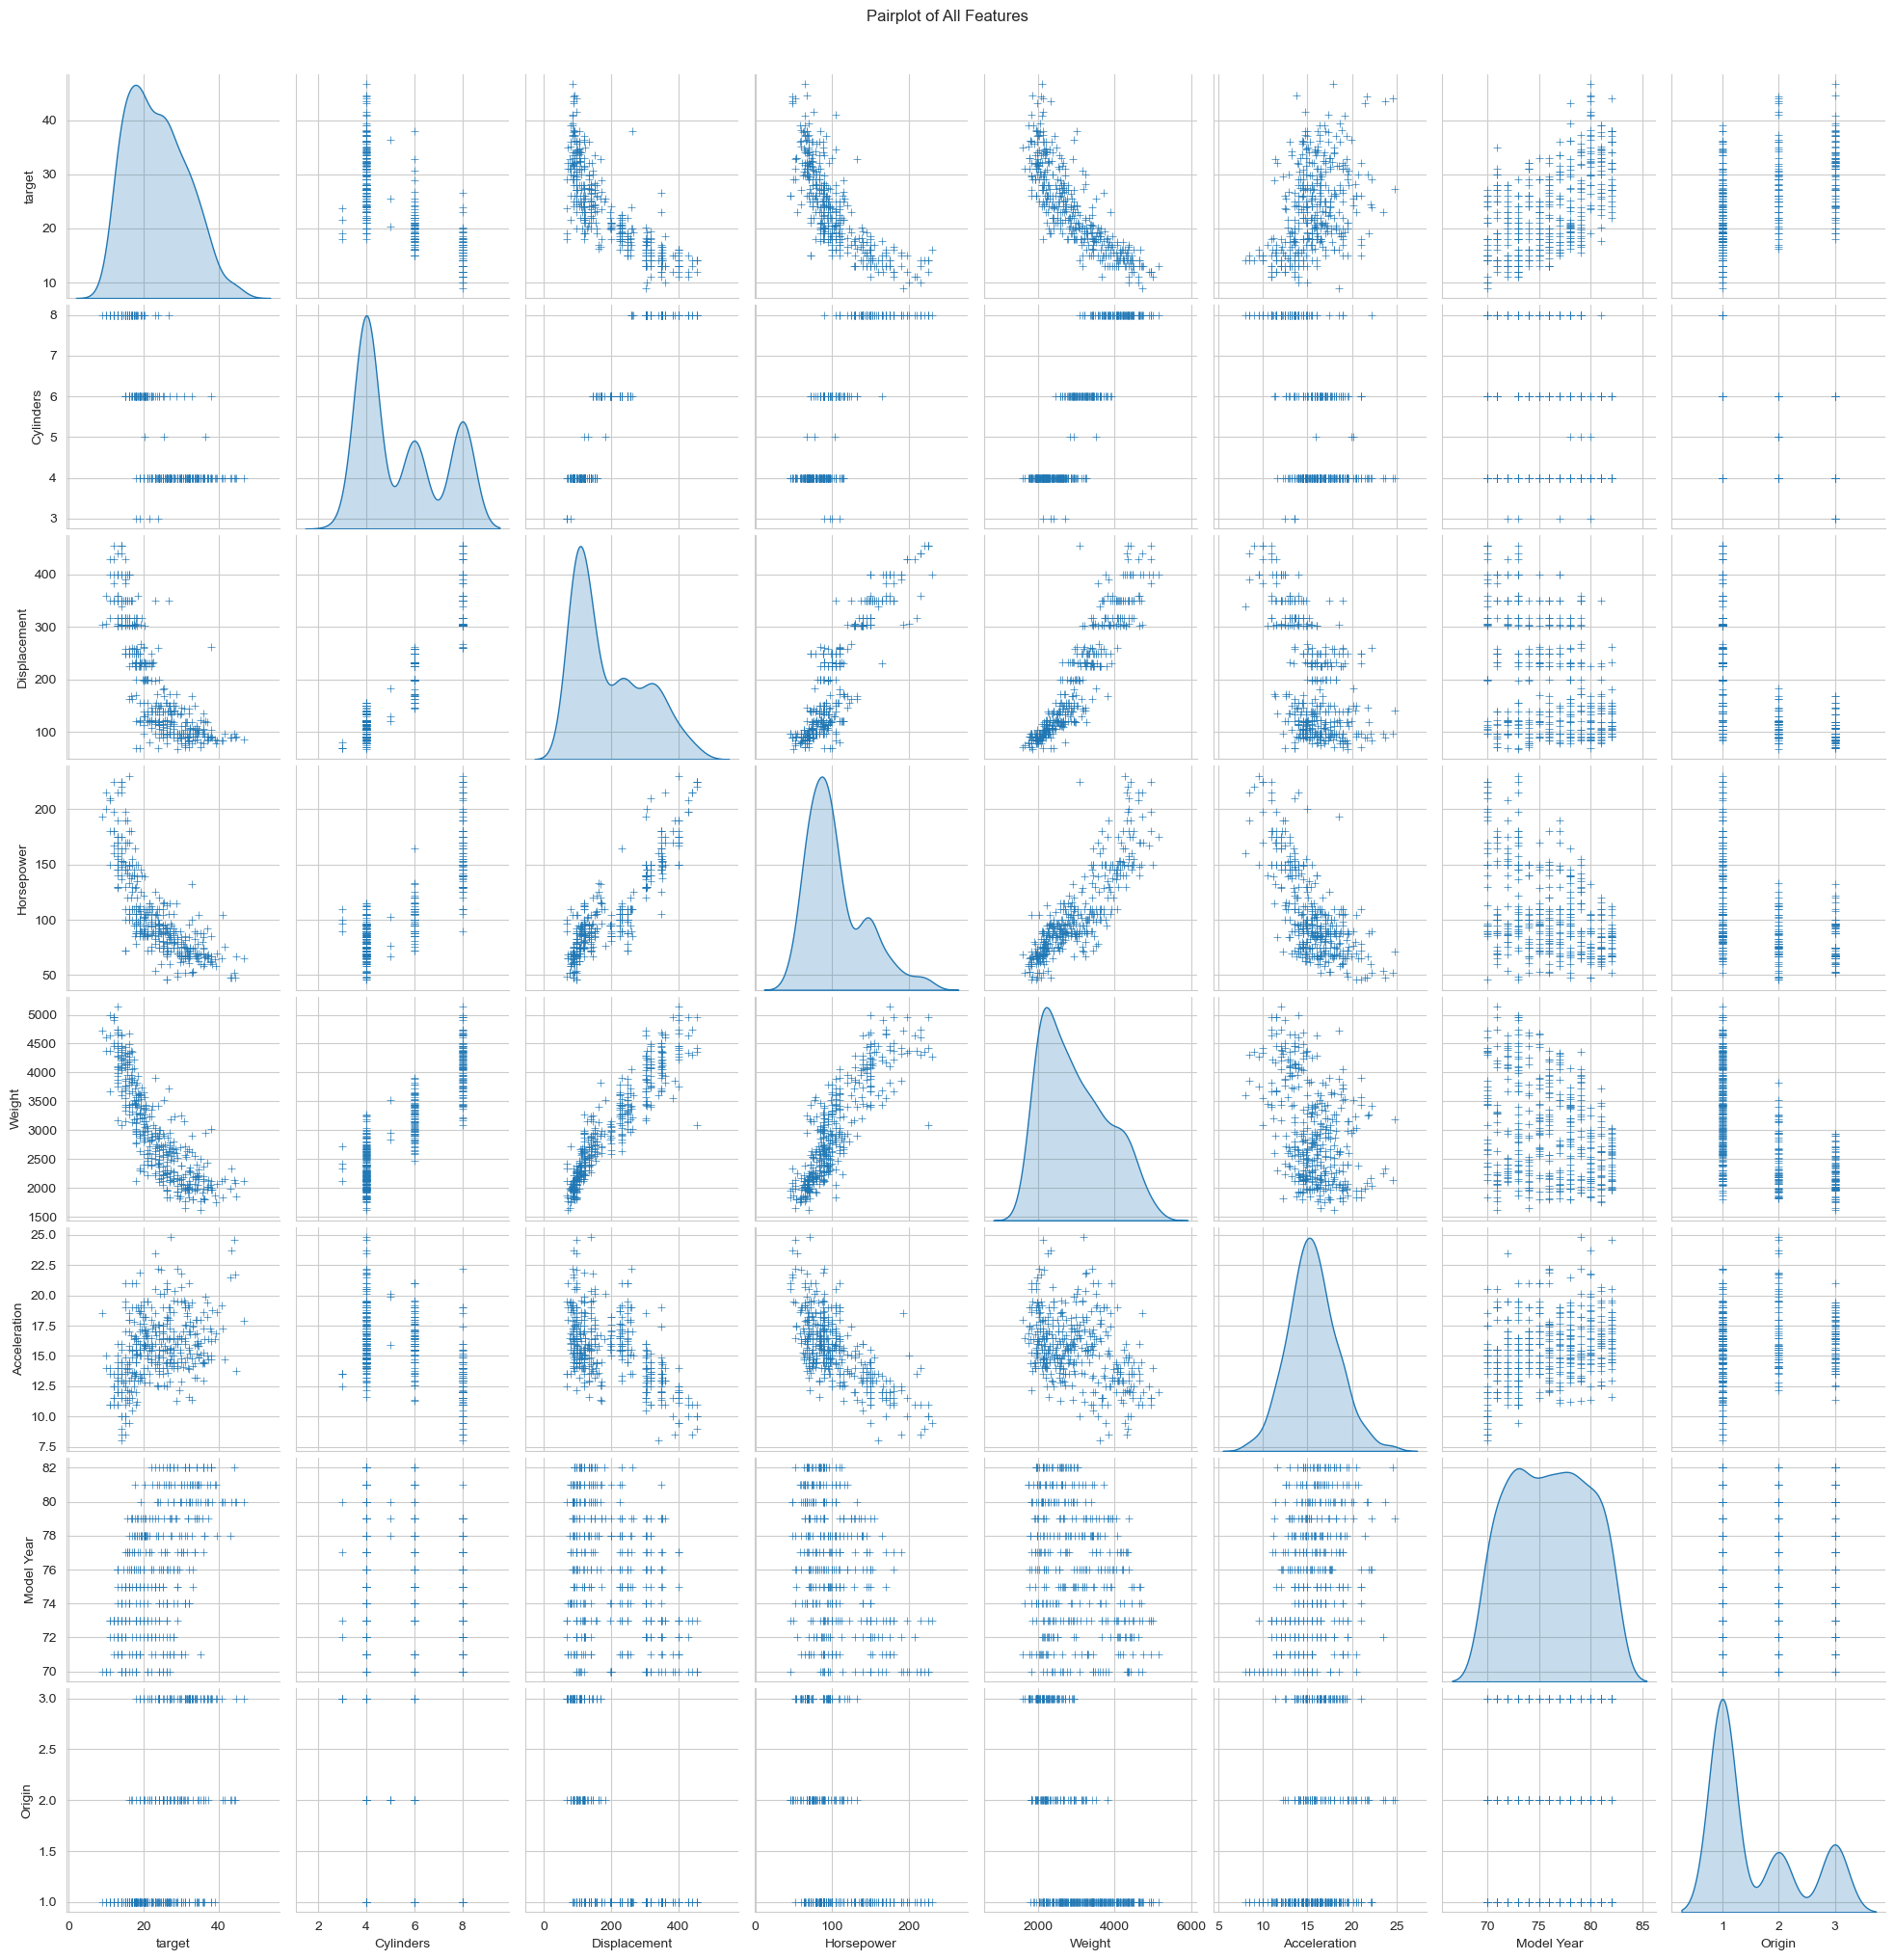

In [12]:
sns.pairplot(data, diag_kind='kde', markers='+')
plt.suptitle('Pairplot of All Features', y=1.02)
plt.show()

## 5. Categorical Feature Analysis

Cylinders and Origin can be treated as categorical features.

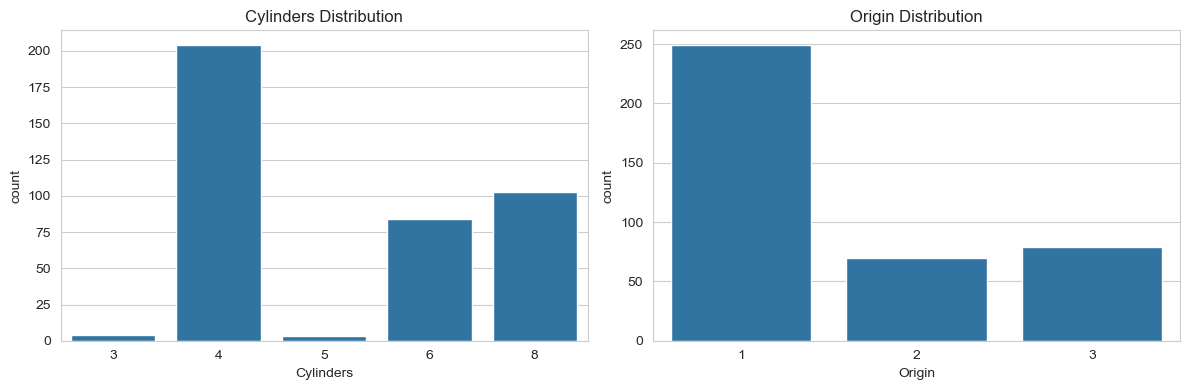

Cylinders value counts:
Cylinders
4    204
8    103
6     84
3      4
5      3
Name: count, dtype: int64

Origin value counts:
Origin
1    249
3     79
2     70
Name: count, dtype: int64


In [13]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.countplot(x='Cylinders', data=data, ax=axes[0])
axes[0].set_title('Cylinders Distribution')

sns.countplot(x='Origin', data=data, ax=axes[1])
axes[1].set_title('Origin Distribution')

plt.tight_layout()
plt.show()

print('Cylinders value counts:')
print(data['Cylinders'].value_counts())
print('\nOrigin value counts:')
print(data['Origin'].value_counts())

## 6. Outlier Detection (Boxplots)

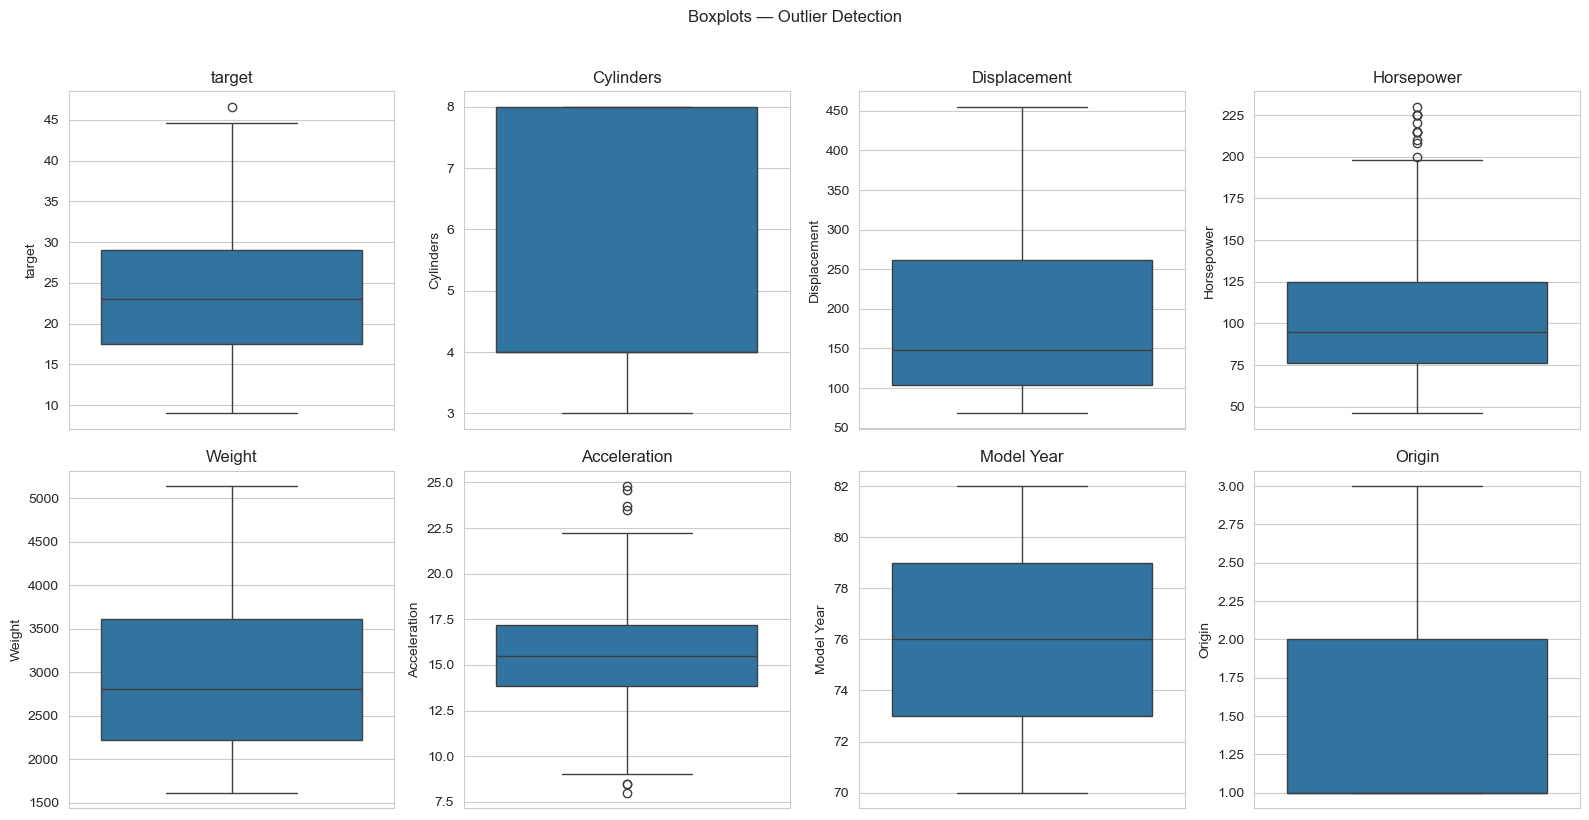

In [14]:
numeric_cols = data.select_dtypes(include=np.number).columns.tolist()
n = len(numeric_cols)
fig, axes = plt.subplots(2, (n + 1) // 2, figsize=(16, 8))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.boxplot(y=data[col], ax=axes[i])
    axes[i].set_title(col)

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.suptitle('Boxplots — Outlier Detection', y=1.02)
plt.tight_layout()
plt.show()

In [15]:
from src.data_preprocessing import remove_outliers

print(f'Before outlier removal: {data.shape[0]} rows')
data = remove_outliers(data, 'Horsepower')
data = remove_outliers(data, 'Acceleration')
print(f'After outlier removal:  {data.shape[0]} rows')

Before outlier removal: 398 rows
After outlier removal:  391 rows


## 7. Target Distribution & Skewness

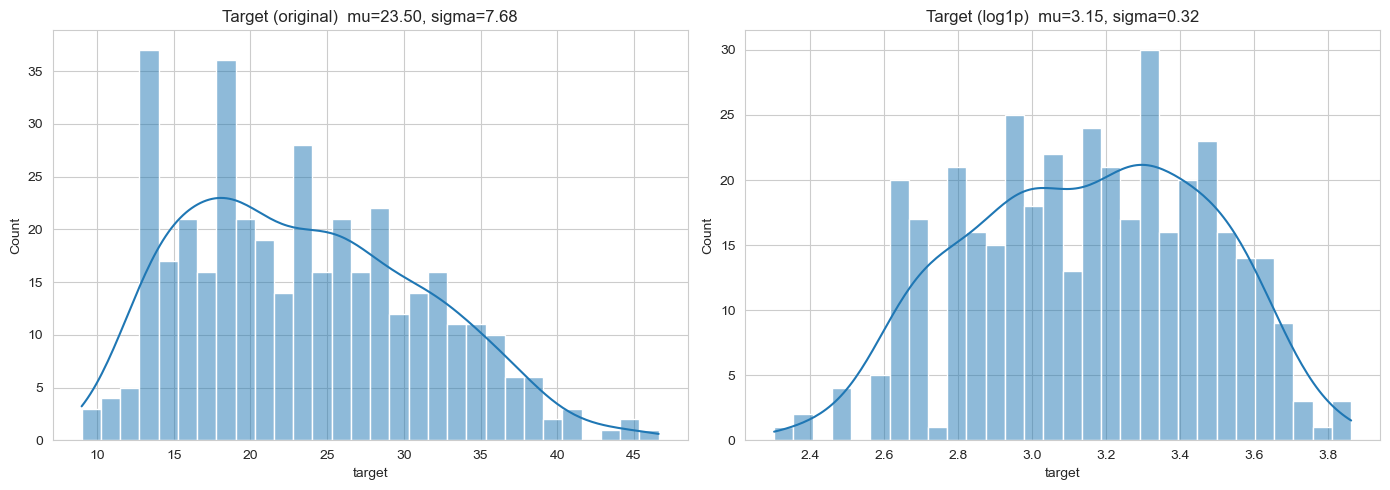

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Before log transform
sns.histplot(data['target'], kde=True, ax=axes[0], bins=30)
mu, sigma = norm.fit(data['target'])
axes[0].set_title(f'Target (original)  mu={mu:.2f}, sigma={sigma:.2f}')

# After log transform
target_log = np.log1p(data['target'])
sns.histplot(target_log, kde=True, ax=axes[1], bins=30)
mu2, sigma2 = norm.fit(target_log)
axes[1].set_title(f'Target (log1p)  mu={mu2:.2f}, sigma={sigma2:.2f}')

plt.tight_layout()
plt.show()

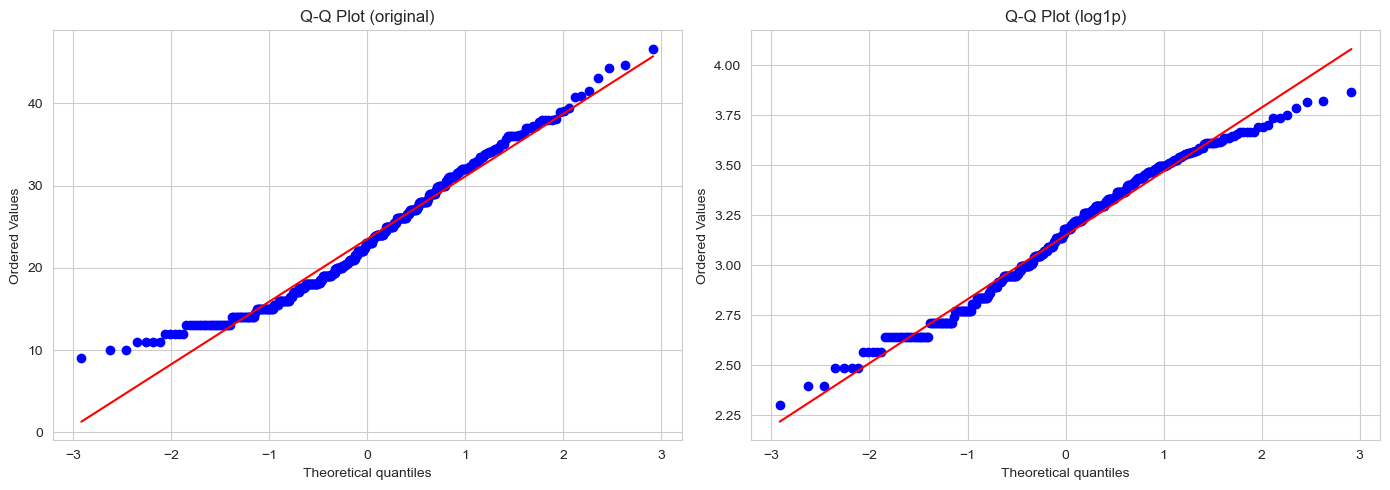

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

stats.probplot(data['target'], plot=axes[0])
axes[0].set_title('Q-Q Plot (original)')

stats.probplot(np.log1p(data['target']), plot=axes[1])
axes[1].set_title('Q-Q Plot (log1p)')

plt.tight_layout()
plt.show()

In [18]:
# Skewness of all numeric features
skewed = data.select_dtypes(include=np.number).apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
pd.DataFrame(skewed, columns=['Skewness'])

,Skewness
Horsepower,1.002620
Origin,0.915147
Displacement,0.692506
Cylinders,0.539419
Weight,0.530167
target,0.420458
Acceleration,0.144566
Model Year,0.010762


## Summary

- **Horsepower** has 6 missing values → filled with mean.
- **Weight, Displacement, Horsepower** are strongly negatively correlated with MPG.
- **Horsepower** and **Acceleration** contain outliers → removed via IQR.
- Target (MPG) benefits from **log1p** transformation for normality.
- **Cylinders** and **Origin** are best treated as categorical (one-hot encoded).